## Eq. of motion


Markert et al. 2001
$$
\ddot{X} + 2D\dot{X} + X = A_0 P(t)
$$

$$
P(t) = \cos \varphi(t)
$$

$$\varphi(t) = \frac{\alpha}{2}t^2 + \eta_0 t + \beta$$


Envelope curve is $Q(t) = B_1 w(v_1(t)) + B_2 w(v_2(t)) + C_1 e^{v_1^2(t) - v_1(t)^2} + C_2 e^{v_2^2(t) - v_2(t)^2}$

In [3]:
from scipy.special import wofz
def w(x):
    return wofz(x)

Text(0, 0.5, '$w(X)$')

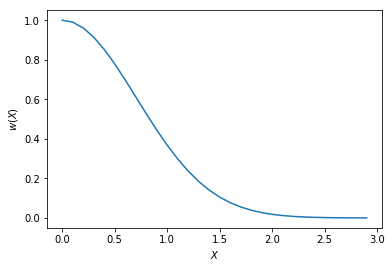

In [12]:
x = np.arange(0., 3., 0.1)
plt.plot(x, w(x), '-')
plt.xlabel('$X$')
plt.ylabel('$w(X)$')

In [76]:
## Parameters:
ipos = 0.
ivelocity = 0.

D = 0.02
alpha = 1e-4
eta0 = 0.6
A0 = 1.
beta = 0.

lambda1 = -D + (0+1j)*np.sqrt(1.-D**2)
lambda2 = -D - (0+1j)*np.sqrt(1.-D**2)

In [77]:
def v1(t):
    prefac = -(1+1j)/(2*np.sqrt(alpha))
    linear = alpha*t + eta0 + (0+1j)*lambda1
    return prefac*linear

def v2(t):
    prefac = (1+1j)/(2*np.sqrt(alpha))
    linear = alpha*t + eta0 + (0+1j)*lambda2
    return prefac*linear



In [78]:
B1 = (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alpha)*A0
B2 = (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alpha)*A0

C1 = (lambda2*ipos - ivelocity)*np.exp(-1j*beta)/(lambda2-lambda1) - B1*w(v1(0))
C2 = (lambda1*ipos - ivelocity)*np.exp(-1j*beta)/(lambda1-lambda2) - B2*w(v2(0))



In [79]:
def Q(t):
    return B1*w(v1(t)) + B2*w(v2(t)) + C1*np.exp(v1(0)**2 - v1(t)**2) + C2*np.exp(v2(0)**2 - v2(t)**2)

In [80]:
def linramp(t):
    return alpha*t + eta0

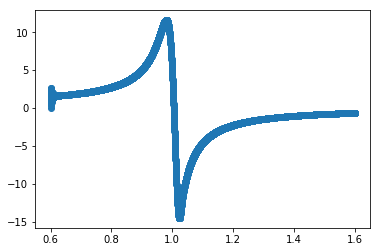

In [81]:
x = np.arange(0., 1/alpha, 1)
plt.plot(linramp(x), Q(x), '-o')